<h1>Introduction to Speeding Metric</h1>

Traffic is something that is very annoying within any major city. As one of the data sets, I am choosing the Traffic data set. I chose this data set because it included a defined list of actual neighborhoods in Pittsburgh, rather than most other sets which didn't specify the neighborhood. I wanted to loo
k into the depression data set I found earlier, but there was no specific data relating to the location of patients. As college students, having access to a car is less cost efficient, so walking, biking, and the bus system are the main ways of transportation. The less that cars speed over the limit implicates that the streets are safer to cross.

<h2>The Metric</h2>	


<h3>Traffic Data</h3>

To figure out how to use the traffic data, I looked through the data's defined labels and decided which labels could be compared. I ended up chosing the percent over the limit. The lower the percent value, the less cars are over the speed limit, which means they are safer all round.

<h2>Best Neighborhood(s) from the Speeding Data</h2>

From the graph, the top areas are the following:

<ol>
  <li>Hill District</li>
  <li>Oakland</li>
  <li>North Side</li>
  <li>Shady Side</li>
  <li>Lawrenceville</li>
</ol>

<h2>The Actual Data</h2>

<h3>Traffic Data</h3>

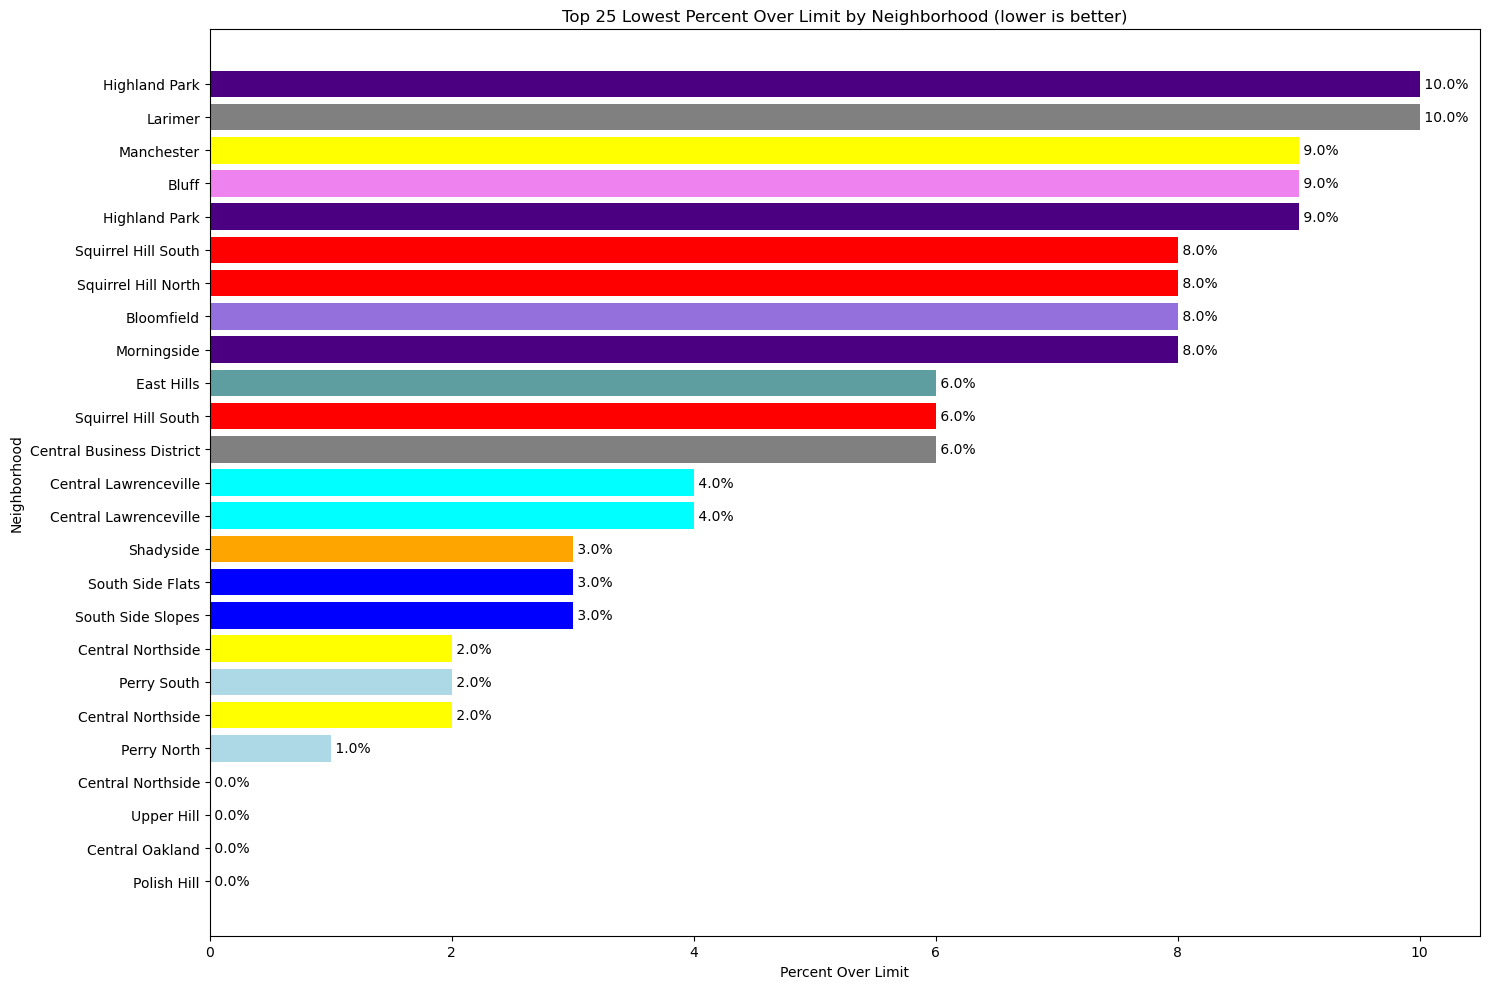

In [5]:
#import all the needed packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#actually grab the data
speed = pd.read_csv("https://data.wprdc.org/datastore/dump/6dfd4f8f-cbf5-4917-a5eb-fd07f4403167")

#get the best neighborhoods from the lowest speeding values
lowest_25 = speed.nsmallest(25, 'percent_over_limit')

#make sure that the data selected is unique (no duplicates)
unique_neighborhoods = lowest_25['neighborhood'].unique()

#similarly located areas share or have similar colors
neighborhood_colors = {
    'Squirrel Hill South': 'red',
    'Squirrel Hill North': 'red',
    'Shadyside': 'orange',
    'Central Northside': 'yellow',
    'Central Oakland': 'green',
    'Polish Hill': 'lightgreen',
    'Upper Hill': 'lightgreen',
    'Perry North': 'lightblue',
    'Perry South': 'lightblue',
    'South Side Flats': 'blue',
    'South Side Slopes': 'blue',
    'Central Lawrenceville': 'cyan',
    'East Hills': 'cadetblue',
    'Bloomfield': 'mediumpurple',
    'Morningside': 'indigo',
    'Bluff': 'violet',
    'Highland Park': 'indigo',
    'Manchester': 'yellow',
}

#if somehow something goes wrong, default colors to gray (only impacts readability)
default_color = 'gray'

#variable for the bar colors to the specific neighborhood
bar_colors = [neighborhood_colors.get(neighborhood, default_color) 
              for neighborhood in lowest_25['neighborhood']]

#actually plot the data onto a bar graph and give it some labels
#sizing of the output graph
plt.figure(figsize=(15, 10))

#size of the bar height and sets the bar color to bar_colors
plt.barh(range(len(lowest_25)), lowest_25['percent_over_limit'], color = bar_colors)

#adds the neighborhood names on the left of the graph
plt.yticks(range(len(lowest_25)), lowest_25['neighborhood'])

#labelings on the bottom, left, and top of the graph
plt.xlabel('Percent Over Limit')
plt.ylabel('Neighborhood')
plt.title('Top 25 Lowest Percent Over Limit by Neighborhood (lower is better)')

#for each bar, add a percent text label next to it
for i, v in enumerate(lowest_25['percent_over_limit']):
    plt.text(v, i, f' {v:.1f}%', va='center')

#show the graph in the output
plt.tight_layout()
plt.show()